In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [36]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1', usecols=[0, 1])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
#Shape Of Data
data.shape

(5572, 2)

In [38]:
#Info Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
#NULL Data
data.isna().sum()

v1    0
v2    0
dtype: int64

In [40]:
data.describe(include='object').transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [41]:
data[data.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [42]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<ipython-input-43-8fe62f961dee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1',data=data,palette='Blues')


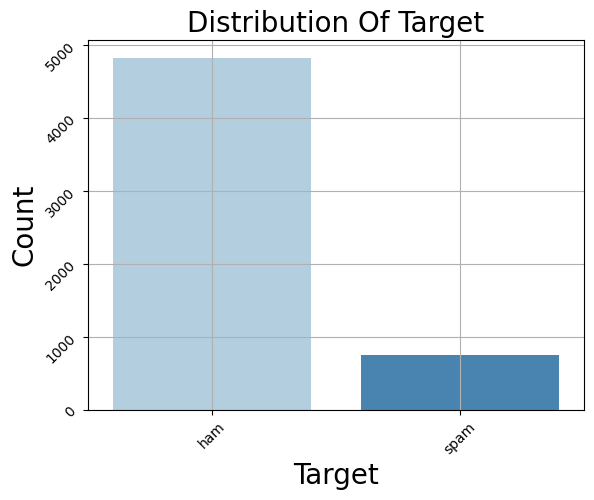

In [43]:
sns.countplot(x='v1',data=data,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [44]:
#Input
Text=data.v2
Text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [45]:
#Output
Target=data.v1
Target

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [46]:
#Transform Output
Target.replace('spam',1,inplace=True)
Target.replace('ham',0,inplace=True)
Target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [52]:
# Split Data (explicitly stating the ratio: 70% training data, 30% testing data)
X_train, X_test, y_train, y_test = train_test_split(Text, Target, test_size=0.3, shuffle=True, random_state=44)

print('X_train Shape (70%):', X_train.shape)
print('X_test Shape (30%):', X_test.shape)
print('y_train Shape (70%):', y_train.shape)
print('y_test Shape (30%):', y_test.shape)


X_train Shape (70%): (3900,)
X_test Shape (30%): (1672,)
y_train Shape (70%): (3900,)
y_test Shape (30%): (1672,)


In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Inisialisasi model Naive Bayes
naive_bayes_model = Pipeline([
    ('vectorizer', CountVectorizer()),  # Konversi teks ke token counts
    ('classifier', MultinomialNB()),     # Klasifikasi Naive Bayes
])

# Latih model menggunakan data latih
naive_bayes_model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [54]:
# Prediksi label data uji menggunakan model yang telah dilatih
y_pred = naive_bayes_model.predict(X_test)


In [55]:
from sklearn.metrics import accuracy_score

# Hitung akurasi model menggunakan metrik evaluasi yang sesuai
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model Naive Bayes:", accuracy)

Akurasi model Naive Bayes: 0.9844497607655502


In [56]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1450    6]
 [  20  196]]


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9702970297029703
Recall: 0.9074074074074074
F1 Score: 0.937799043062201


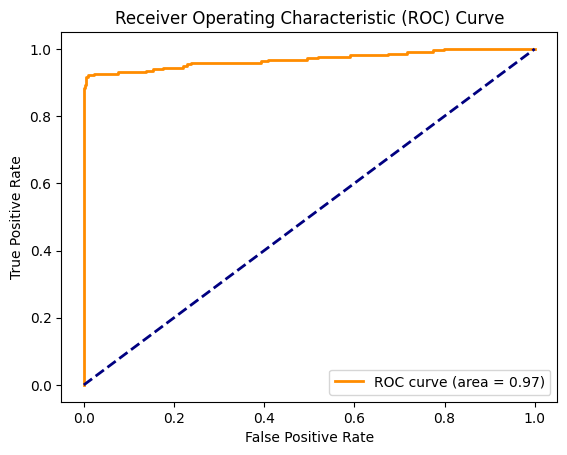

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Hitung probabilitas prediksi untuk kelas positif
y_prob = naive_bayes_model.predict_proba(X_test)[:, 1]

# Hitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [60]:
# Split Data (mengubah rasio menjadi 70% data latih, 30% data uji)
X_train, X_test, y_train, y_test = train_test_split(Text, Target, test_size=0.3, shuffle=True, random_state=44)

print('Ukuran Data Latih (X_train, y_train):')
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)

print('\nUkuran Data Uji (X_test, y_test):')
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)


Ukuran Data Latih (X_train, y_train):
X_train Shape: (3900,)
y_train Shape: (3900,)

Ukuran Data Uji (X_test, y_test):
X_test Shape: (1672,)
y_test Shape: (1672,)


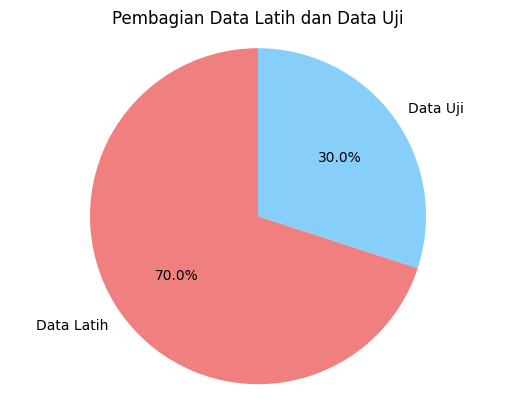

In [61]:
import matplotlib.pyplot as plt

# Menghitung panjang data latih dan data uji
train_length = len(X_train)
test_length = len(X_test)

# Persentase data latih dan data uji
train_percentage = (train_length / (train_length + test_length)) * 100
test_percentage = (test_length / (train_length + test_length)) * 100

# Membuat grafik pie chart
labels = 'Data Latih', 'Data Uji'
sizes = [train_percentage, test_percentage]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Memastikan bahwa pie chart berbentuk lingkaran
plt.title('Pembagian Data Latih dan Data Uji')

# Menampilkan grafik
plt.show()
